In [221]:
from pathlib import Path
notebook_path = Path().cwd().parent.parent.parent.parent
import sys; sys.path.insert(0, str(notebook_path))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter
from functools import reduce


# Custom imports
from explore.gcp.storage import gcp
from explore.src.explore import describe_data

pd.set_option('display.max_columns', None)

In [222]:
df = gcp.read_df_from_bucket(bucket_name='transfermarkt_db', blob_name='premier_league_player_valuations.csv')

[02/22/24 21:39:17] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=860568;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=417291;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

[02/22/24 21:39:18] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=347051;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=277552;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [223]:
df.head()

,tm_id,tm_name,player,squad_num,position,age,country,current_club,height,foot,signed_date,signed_from,signing_fee_euro_mill,contract_expiry,market_value_euro_mill,season,league,team
0,238223,ederson,Ederson,31,Goalkeeper,24,Brazil,Manchester City,188.0,left,"Jul 1, 2017",SL Benfica,40.0,NaN,50.0,2017,premier_league,manchester-city
1,40204,joe-hart,Joe Hart,0,Goalkeeper,31,England,Celtic FC,196.0,right,"Jul 1, 2006",Shrewsbury Town,0.9,NaN,10.0,2017,premier_league,manchester-city
2,40423,claudio-bravo,Claudio Bravo,1,Goalkeeper,35,Chile,Real Betis Balompié,184.0,right,"Aug 25, 2016",FC Barcelona,18.0,NaN,3.5,2017,premier_league,manchester-city
3,201574,angus-gunn,Angus Gunn,54,Goalkeeper,22,Scotland,Norwich City,196.0,right,"Jul 1, 2016",Manchester City U23,NaN,NaN,2.0,2017,premier_league,manchester-city
4,186590,john-stones,John Stones,5,Centre-Back,24,England,Manchester City,188.0,right,"Aug 9, 2016",Everton FC,55.6,NaN,50.0,2017,premier_league,manchester-city


In [224]:
df.shape

(5288, 18)

In [225]:
describe_data(df)

,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
tm_id,int64,0,0.00,2104,2857.0,1082850.0,249241.0,288876.77,208424.04,28,0.53
squad_num,int64,0,0.00,96,0.0,98.0,14.0,17.87,17.30,122,2.31
age,int64,0,0.00,26,16.0,41.0,25.0,25.33,4.78,0,0.00
height,float64,2,0.04,43,0.0,206.0,183.0,177.69,31.18,154,2.91
signing_fee_euro_mill,float64,1112,21.03,433,0.0,121.0,5.6,12.83,17.66,269,5.09
market_value_euro_mill,float64,506,9.57,132,0.1,180.0,7.0,14.02,18.96,333,6.30
season,int64,0,0.00,7,2017.0,2023.0,2020.0,2019.93,1.93,0,0.00


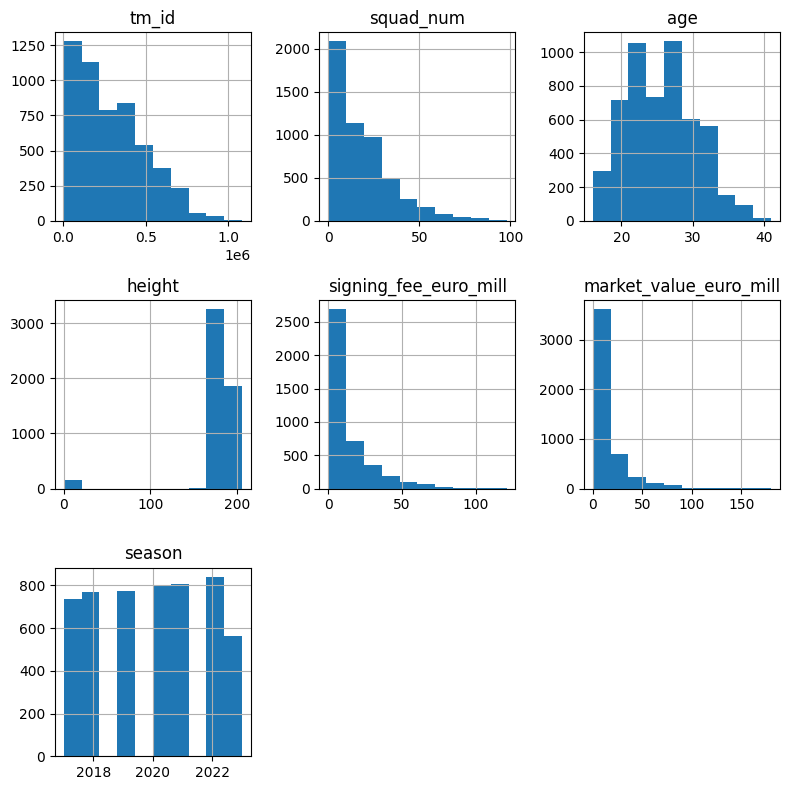

In [226]:
df.hist(figsize=(8,8))
plt.tight_layout()

## Categorical Analysis

In [227]:
df.head()

,tm_id,tm_name,player,squad_num,position,age,country,current_club,height,foot,signed_date,signed_from,signing_fee_euro_mill,contract_expiry,market_value_euro_mill,season,league,team
0,238223,ederson,Ederson,31,Goalkeeper,24,Brazil,Manchester City,188.0,left,"Jul 1, 2017",SL Benfica,40.0,NaN,50.0,2017,premier_league,manchester-city
1,40204,joe-hart,Joe Hart,0,Goalkeeper,31,England,Celtic FC,196.0,right,"Jul 1, 2006",Shrewsbury Town,0.9,NaN,10.0,2017,premier_league,manchester-city
2,40423,claudio-bravo,Claudio Bravo,1,Goalkeeper,35,Chile,Real Betis Balompié,184.0,right,"Aug 25, 2016",FC Barcelona,18.0,NaN,3.5,2017,premier_league,manchester-city
3,201574,angus-gunn,Angus Gunn,54,Goalkeeper,22,Scotland,Norwich City,196.0,right,"Jul 1, 2016",Manchester City U23,NaN,NaN,2.0,2017,premier_league,manchester-city
4,186590,john-stones,John Stones,5,Centre-Back,24,England,Manchester City,188.0,right,"Aug 9, 2016",Everton FC,55.6,NaN,50.0,2017,premier_league,manchester-city


In [228]:
def cat_distributions_plot(df: pd.DataFrame, cat_col: str, var: str):
    if cat_col == 'position':
        data = (
            df.groupby(cat_col)[var].mean().sort_values(ascending=False)
        )
    else:
        data = (
            df.groupby(cat_col)[var].mean().sort_values(ascending=False)[:10]
        )
    return px.bar(
        data_frame=data,
        x=data.index,
        y=data.values,
        title=f"Average {var} by {cat_col}",
        labels={"x": cat_col.capitalize(), "y": f"Average {var}"},
    )

## Position Analysis

In [229]:
pos_vals = df.groupby('position')[['signing_fee_euro_mill', 'market_value_euro_mill']].mean().reset_index()
pos_vals

,position,signing_fee_euro_mill,market_value_euro_mill
0,Attacking-Midfield,17.998405,21.051434
1,Central-Midfield,12.110306,12.798059
2,Centre-Back,12.399205,12.730437
3,Centre-Forward,15.623824,16.335008
4,Defensive-Midfield,15.716676,17.190649
5,Goalkeeper,6.836134,6.339900
6,Left-Back,10.760579,11.301113
7,Left-Midfield,9.145000,9.252632
8,Left-Winger,15.165451,20.462229
9,Right-Back,9.273994,11.395739


In [230]:
def valuation_plot(df: pd.DataFrame, column: str) -> go.Figure:
    df = df.groupby(column)[["signing_fee_euro_mill", "market_value_euro_mill"]].mean().reset_index()
    
    fig = make_subplots(rows=1, cols=1)

    fig.add_trace(
        go.Bar(
            x=df[column],
            y=df["signing_fee_euro_mill"],
            name="Signing Fee",
        ),
        row=1,
        col=1,
    )

    fig.add_trace(
        go.Bar(
            x=df[column],
            y=df["market_value_euro_mill"],
            name="Market Value",
        ),
        row=1,
        col=1,
    )

    fig.update_layout(
        title=f"Average Signing Fee and Market Value by {column.capitalize()}",
        xaxis_title=f"{column.capitalize()}",
        yaxis_title="Average Value",
        legend_title="Value Type",
        barmode="group",
        xaxis={"categoryorder": "total descending"},
    )
    return fig

In [231]:
valuation_plot(df, 'position')

## Country Analysis

Get the countries with the most players in the premier league

In [232]:
# get the top 10 clubs by average signing fee for countries with the most players
top_countries = df["country"].value_counts().index[:10]
countries = df[df["country"].isin(top_countries)]

In [233]:
# df.loc[df['season'] == 2017]['country'].value_counts()
df.loc[df['season'] == 2023]

,tm_id,tm_name,player,squad_num,position,age,country,current_club,height,foot,signed_date,signed_from,signing_fee_euro_mill,contract_expiry,market_value_euro_mill,season,league,team
4724,238223,ederson,Ederson,31,Goalkeeper,30,Brazil,manchester-city,188.0,left,"Jul 1, 2017",SL Benfica,40.00,"Jun 30, 2026",40.00,2023,premier_league,manchester-city
4725,85941,stefan-ortega,Stefan Ortega,18,Goalkeeper,31,Germany,manchester-city,185.0,right,"Jul 1, 2022",Arminia Bielefeld,0.00,"Jun 30, 2025",9.00,2023,premier_league,manchester-city
4726,221624,zack-steffen,Zack Steffen,13,Goalkeeper,28,United States,manchester-city,191.0,right,"Jul 9, 2019",Columbus Crew SC,6.82,"Jun 30, 2025",2.50,2023,premier_league,manchester-city
4727,14555,scott-carson,Scott Carson,33,Goalkeeper,38,England,manchester-city,188.0,right,"Jul 20, 2021",Derby County,0.00,"Jun 30, 2024",0.20,2023,premier_league,manchester-city
4728,258004,ruben-dias,Rúben Dias,3,Centre-Back,26,Portugal,manchester-city,187.0,right,"Sep 29, 2020",SL Benfica,71.60,"Jun 30, 2027",80.00,2023,premier_league,manchester-city
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5283,246963,carlton-morris,Carlton Morris,9,Centre-Forward,28,England,luton-town,185.0,right,"Jul 6, 2022",Barnsley FC,2.00,NaN,13.00,2023,premier_league,luton-town
5284,319900,elijah-adebayo,Elijah Adebayo,11,Centre-Forward,25,England,luton-town,193.0,,"Feb 1, 2021",Walsall FC,NaN,NaN,7.00,2023,premier_league,luton-town
5285,469958,jacob-brown,Jacob Brown,19,Centre-Forward,25,Scotland,luton-town,178.0,right,"Aug 10, 2023",Stoke City,2.90,"Jun 30, 2027",4.00,2023,premier_league,luton-town
5286,169801,cauley-woodrow,Cauley Woodrow,10,Centre-Forward,29,England,luton-town,184.0,right,"Jul 1, 2022",Barnsley FC,NaN,NaN,1.00,2023,premier_league,luton-town


In [259]:
def var_totals_by_season(df: pd.DataFrame, var: str) -> pd.DataFrame:
    seasons = df["season"].unique()

    def get_country_counts(season: int) -> pd.DataFrame:
        data = df.loc[df["season"] == season][var].value_counts().reset_index()
        data.columns = ["country", f"{season}"]
        return data

    data = [get_country_counts(season) for season in seasons]

    return reduce(lambda left, right: pd.merge(left, right, on="country"), data)


dff = var_totals_by_season(df, "country")

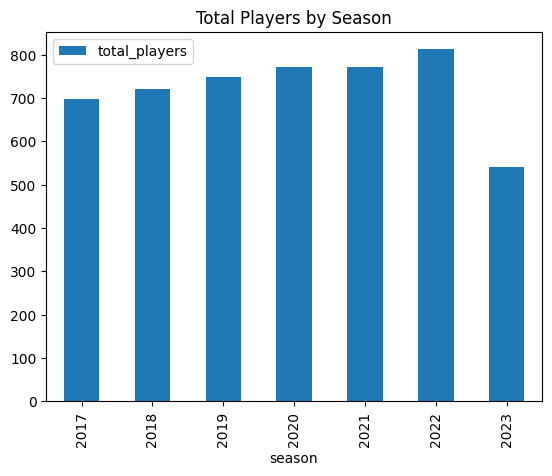

In [260]:
sum_players = dff.sum(numeric_only=True, axis=0).sort_values(ascending=False).reset_index()
sumplayers = sum_players.rename(columns={'index': 'season', 0: 'total_players'})
sumplayers.loc[:, 'season'] = sumplayers['season'].astype('Int16')
sumplayers.sort_values(by='season').plot(x='season', y='total_players', kind='bar', title='Total Players by Season')
plt.show()

In [252]:
pd.melt(dff, id_vars='country', value_vars=['2017', '2018', '2019', '2020', '2021', '2022', '2023'])

,country,variable,value
0,England,2017,276
1,Spain,2017,34
2,Netherlands,2017,29
3,France,2017,28
4,Ireland,2017,26
...,...,...,...
359,Ukraine,2023,5
360,Tunisia,2023,2
361,Turkey,2023,1
362,Ecuador,2023,2


In [262]:
# plot time series of total players by country
line_df = dff.sort_values("2023", ascending=False)[1:11]
line_dff = pd.melt(line_df, id_vars='country', value_vars=line_df.columns[1:])

px.line(
    line_dff,
    x="variable",
    y="value",
    color='country', 
    title="Top 10 Countries by Total Players",
    labels={"value": "Total Players", "variable": "Season"},
)

/Users/conal/Projects/fpl_app/exploration/.venv/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [172]:
top_countries_df = countcountries['country'].value_counts().head(10).reset_index()
top_countries_df

,country,count
0,England,2035
1,Spain,234
2,France,215
3,Ireland,191
4,Brazil,188
5,Netherlands,162
6,Portugal,157
7,Scotland,156
8,Wales,139
9,Belgium,122


In [175]:
fig = px.bar(
    data_frame=top_countries_df,
    x='country',
    y='count'
)

fig.update_layout(
    title="Top 10 Most Represented Countries in the Premier League",
    xaxis_title="Country",
    yaxis_title="Number of Players",
)

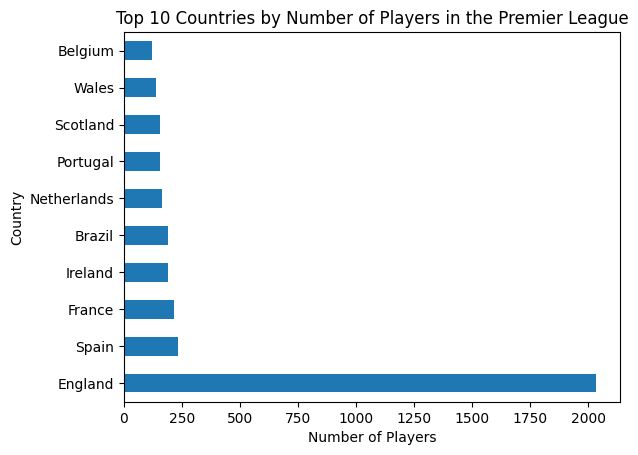

In [107]:
countries['country'].value_counts().head(10).plot(kind='barh')
plt.xlabel('Number of Players')
plt.ylabel('Country')
plt.title('Top 10 Countries by Number of Players in the Premier League')
plt.show()

In [108]:
valuation_plot(countries, 'country')

## Team Analysis

In [109]:
valuation_plot(df, 'team')

## Signing value analysis

Difference between average signing fee and average market value

In [151]:
data = df.groupby("team")[
    ["signing_fee_euro_mill", "market_value_euro_mill"]
].mean().sort_values(by="signing_fee_euro_mill", ascending=False).reset_index()

data.loc[:, 'diff_value_paid'] = data['market_value_euro_mill'] - data['signing_fee_euro_mill']

data = data.sort_values(by='diff_value_paid', ascending=False).reset_index(drop=True)
data['color'] = data['diff_value_paid'].apply(lambda x: 'blue' if x > 0 else 'red')

In [111]:
fig = px.bar(
    data_frame=data,
    x="team",
    y="diff_value_paid",
    title="Difference between market value and signing fee",
    labels={"x": "Team", "y": "Difference in value"},
    color="color",
)
fig.update_layout(
    showlegend=False,
)

/Users/conal/Projects/fpl_app/exploration/.venv/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Explanations for difference between average signing value and the average market value for a team's players.

Positive differences:
- Teams with a positive difference are good at buying players for a reasonable price
- They improve their players therefore increasing their value
- As the premier league has higher wages, it may inflate a players value just because they've signed with a premier league team
- liverpool have the greatest positive difference, this is expected given signings such as Salah and Mane (approx. €40 million each) have delivered enormously over the last 7 seasons resulting in increased market values. 

Negative differences:
- Not great at buying a player for their real value
- Unable to develop players or because they've been signed for too much, players regress to their real value
- Manchester United have a negative difference of €10.9 million which is expected when we consider that they have spent vast sums of money on players with little return. For example, the signing of Antony for €90 million who's value will have decreased drastically due to sub par performances


In [163]:
def create_diff_val_paid_perc(df: pd.DataFrame) -> pd.DataFrame:
    df.loc[:, 'diff_value_paid_perc'] = round((df['diff_value_paid'] / df['signing_fee_euro_mill']) * 100, 2)
    return df

data = create_diff_val_paid_perc(data)

data = data.sort_values(by='diff_value_paid_perc', ascending=False)

px.bar(
    data_frame=data,
    x="team",
    y="diff_value_paid_perc",
    title="Difference between market value and signing fee as a percentage",
    labels={"x": "Team", "y": "Difference in value (%)"},
    color="color",
)

/Users/conal/Projects/fpl_app/exploration/.venv/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



- Teams that have been promoted recently seem to be proportionally better at signing players for lower than their market value
- likely because, they have less money to work with, player values may increase upon promotion, less data on, for example, Luton Town who have only been in the league for this season


In [155]:
def count_season_apps(df: pd.DataFrame) -> pd.DataFrame:
    seasons = df["season"].unique()

    # count the number of appearances by team
    teams = []
    for season in seasons:
        values = df.loc[df["season"] == season]["team"].unique().tolist()
        teams.extend(values)

    cnt = Counter(teams)

    # create a dataframe from the counter
    return pd.DataFrame(
        {"teams": list(cnt.keys()), "appearances": list(cnt.values())}
    ).sort_values(by="appearances", ascending=False)
    
league_apps = count_season_apps(df)

In [156]:
def plot_season_apps(df: pd.DataFrame) -> go.Figure:

    # plot the appearances
    fig = px.bar(
        data_frame=df,
        x="teams",
        y="appearances",
        title="Number of Season Appearances by Team",
    )
    
    fig.update_layout(
        xaxis_title="Team",
        yaxis_title="Appearances",
    )
    return fig

plot_season_apps(league_apps)

Lets look at the signing value attainment from teams that have spent 4 or more seasons in the premier league over the last 7 seasons

In [157]:
def season_app_filter(df: pd.DataFrame, apps: str) -> list[str]:
    return df.loc[df['appearances'] > apps]['teams'].values.tolist()

In [164]:
teams = season_app_filter(league_apps, 5)

fig = px.bar(
    data_frame=data.loc[data['team'].isin(teams)].sort_values(by='diff_value_paid', ascending=False),
    x="team",
    y="diff_value_paid",
    title="Difference between market value and signing fee for teams with 4 or more league appearances",
    color="color",
)
fig.update_layout(
    showlegend=False,
    xaxis_title="Team",
    yaxis_title="Difference in value",
)

/Users/conal/Projects/fpl_app/exploration/.venv/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [165]:
team_vals = data.loc[data['team'].isin(teams)].sort_values(by='diff_value_paid', ascending=False)
team_vals.head()

,team,signing_fee_euro_mill,market_value_euro_mill,diff_value_paid,color,diff_value_paid_perc
0,fc-liverpool,19.182205,26.477400,7.295195,blue,38.03
1,tottenham-hotspur,16.695854,23.463816,6.767962,blue,40.54
3,fc-arsenal,19.091787,22.284244,3.192456,blue,16.72
4,manchester-city,32.224766,34.907320,2.682553,blue,8.32
5,brighton-amp-hove-albion,5.873409,8.521961,2.648552,blue,45.09


In [266]:
def plot_diff_val_paid(df: pd.DataFrame, column: str) -> go.Figure:
    fig = make_subplots(
        rows=2,
        cols=1,
        shared_xaxes=True,
        vertical_spacing=0.1,
        subplot_titles=("Difference in Value", "Difference in Value (%)"),
    )

    fig.add_trace(
        go.Bar(
            x=df[column],
            y=df["diff_value_paid"],
            name="Difference in Value",
            marker_color=df["color"],
        ),
        row=1,
        col=1,
    )

    fig.add_trace(
        go.Bar(
            x=df[column],
            y=df["diff_value_paid_perc"],
            name="Difference in Value (%)",
            marker_color=df["color"],
        ),
        row=2,
        col=1,
    )

    fig.update_layout(
        title=f"Difference in value by team",
        xaxis_title=f"Team",
        yaxis_title="Average Value",
        legend_title="Value Type",
        barmode="group",
        xaxis={"categoryorder": "total descending"},
        showlegend=False,
    )
    return fig

plot_diff_val_paid(team_vals, 'team')

Most expensive signings per season

In [118]:
# create signed year column
df.loc[:, 'signed_year'] = df['signed_date'].str.split(' ').str[2].astype('Int32')
df.loc[:, 'signed_year'] = df['signed_year'].astype('Int32')

In [119]:
df.loc[df['player'].str.contains('Bruyne')]

,tm_id,tm_name,player,squad_num,position,age,country,current_club,height,foot,signed_date,signed_from,signing_fee_euro_mill,contract_expiry,market_value_euro_mill,season,league,team,signed_year
20,88755,kevin-de-bruyne,Kevin De Bruyne,17,Attacking-Midfield,27,Belgium,Manchester City,181.0,right,"Aug 30, 2015",VfL Wolfsburg,76.0,NaN,150.0,2017,premier_league,manchester-city,2015
768,88755,kevin-de-bruyne,Kevin De Bruyne,17,Attacking-Midfield,28,Belgium,Manchester City,181.0,right,"Aug 30, 2015",VfL Wolfsburg,76.0,NaN,130.0,2018,premier_league,manchester-city,2015
1527,88755,kevin-de-bruyne,Kevin De Bruyne,17,Attacking-Midfield,29,Belgium,Manchester City,181.0,right,"Aug 30, 2015",VfL Wolfsburg,76.0,NaN,120.0,2019,premier_league,manchester-city,2015
2304,88755,kevin-de-bruyne,Kevin De Bruyne,17,Attacking-Midfield,30,Belgium,Manchester City,181.0,right,"Aug 30, 2015",VfL Wolfsburg,76.0,NaN,100.0,2020,premier_league,manchester-city,2015
3105,88755,kevin-de-bruyne,Kevin De Bruyne,17,Attacking-Midfield,31,Belgium,Manchester City,181.0,right,"Aug 30, 2015",VfL Wolfsburg,76.0,NaN,85.0,2021,premier_league,manchester-city,2015
3907,88755,kevin-de-bruyne,Kevin De Bruyne,17,Attacking-Midfield,32,Belgium,Manchester City,181.0,right,"Aug 30, 2015",VfL Wolfsburg,76.0,NaN,70.0,2022,premier_league,manchester-city,2015
4741,88755,kevin-de-bruyne,Kevin De Bruyne,17,Attacking-Midfield,32,Belgium,manchester-city,181.0,right,"Aug 30, 2015",VfL Wolfsburg,76.0,"Jun 30, 2025",60.0,2023,premier_league,manchester-city,2015


- The market value column is the value of the player at the end of that season
- Therefore, to see what a player was signed for versus their market value at the time, we need to do it from 2018 signings onwards?
- Might be an issue if the player was signed from outside the premier league, therefore, we will not have an accurate market value when they're were signed available
- Need to get a timeline of market values for each player to accurately get their value when they were signed

We can get a good picture of how successful a signing was though based on how their end of season market value lines up with the fee they were signed for

In [120]:
# copy original dataframe
dff = df.copy()

def filter_signing_season(df: pd.DataFrame, year: int):
    return df.loc[(df["signed_year"] == year) & (df["season"] == year)].sort_values(
        "signing_fee_euro_mill", ascending=False
    )

data = [filter_signing_season(dff, year) for year in dff['signed_year'].unique() if year is not None]

diff_mv_df = pd.concat(data)

In [167]:
diff_mv_df.head()

,tm_id,tm_name,player,squad_num,position,age,country,current_club,height,foot,signed_date,signed_from,signing_fee_euro_mill,contract_expiry,market_value_euro_mill,season,league,team,signed_year,diff_sign_fee_mv
142,96341,romelu-lukaku,Romelu Lukaku,9,Centre-Forward,25,Belgium,AS Roma,191.0,left,"Jul 10, 2017",Everton FC,84.7,NaN,90.0,2017,premier_league,manchester-united,2017,5.3
74,128223,alvaro-morata,Álvaro Morata,9,Centre-Forward,25,Spain,Atlético de Madrid,189.0,right,"Jul 21, 2017",Real Madrid,66.0,NaN,65.0,2017,premier_league,fc-chelsea,2017,-1.0
11,157495,benjamin-mendy,Benjamin Mendy,22,Left-Back,23,France,FC Lorient,185.0,left,"Jul 24, 2017",AS Monaco,57.5,NaN,40.0,2017,premier_league,manchester-city,2017,-17.5
222,93720,alexandre-lacazette,Alexandre Lacazette,9,Centre-Forward,27,France,Olympique Lyon,175.0,right,"Jul 5, 2017",Olympique Lyon,53.0,NaN,60.0,2017,premier_league,fc-arsenal,2017,7.0
13,95424,kyle-walker,Kyle Walker,2,Right-Back,28,England,Manchester City,183.0,right,"Jul 14, 2017",Tottenham Hotspur,52.7,NaN,50.0,2017,premier_league,manchester-city,2017,-2.7


In [121]:
diff_mv_df.loc[:, 'diff_sign_fee_mv'] = diff_mv_df['market_value_euro_mill'] - diff_mv_df['signing_fee_euro_mill']  

In [122]:
successful_signings = diff_mv_df.loc[diff_mv_df["signing_fee_euro_mill"] != 0].sort_values(
    by="diff_sign_fee_mv", ascending=False
).reset_index(drop=True)

In [123]:
px.bar(
    data_frame=successful_signings.head(10),
    x="player",
    y="diff_sign_fee_mv",
    title="Difference between market value and signing fee",
    labels={"x": "Player", "y": "Difference in value"},
)

In [124]:
px.bar(
    data_frame=successful_signings.loc[successful_signings['diff_sign_fee_mv'].notna()].tail(10),
    x="player",
    y="diff_sign_fee_mv",
    title="Difference between market value and signing fee",
    labels={"x": "Player", "y": "Difference in value"},
)

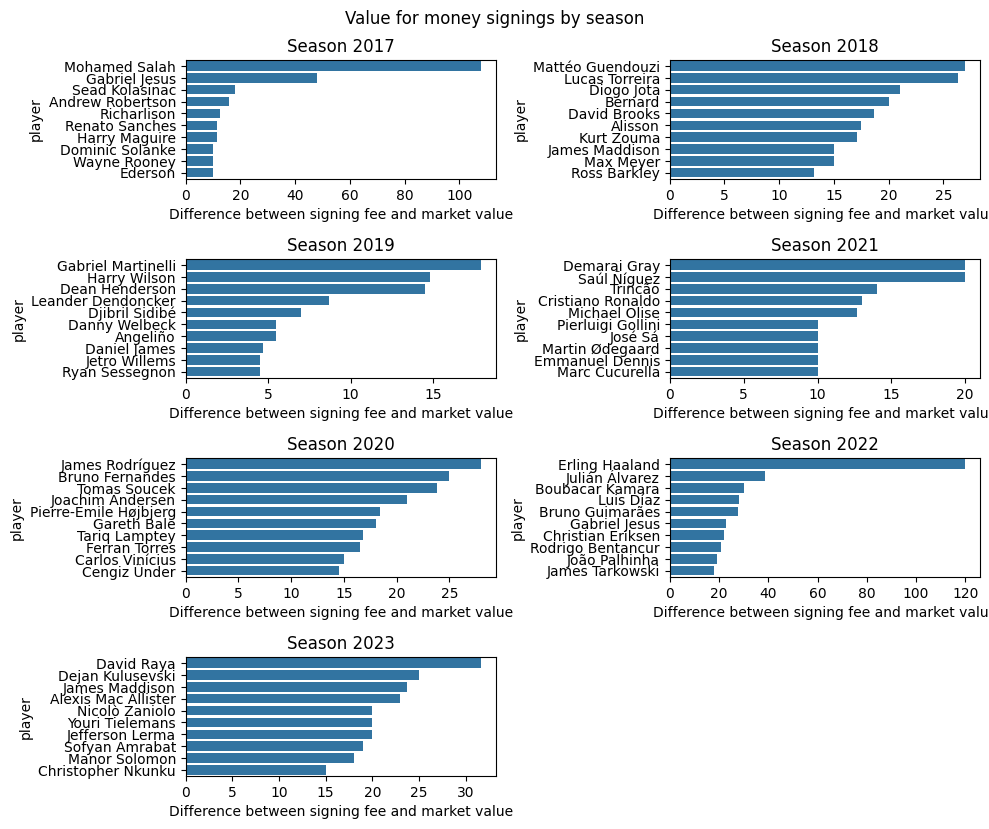

In [125]:
fig, axes = plt.subplots(5, 2, figsize=(10, 10))

# remove empty subplots
for i in range(len(diff_mv_df["season"].unique().tolist()), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

for stat, ax in zip(diff_mv_df["season"].unique().tolist(), axes.flatten()):
    sns.barplot(
        data=diff_mv_df.loc[diff_mv_df["season"] == stat]
        .sort_values(by="diff_sign_fee_mv", ascending=False)
        .head(10),
        y="player",
        x="diff_sign_fee_mv",
        orient="h",
        ax=ax,
    )
    ax.set_title(f"Season {stat}")
    ax.set_xlabel("Difference between signing fee and market value")

plt.suptitle("Value for money signings by season")
plt.tight_layout()
plt.show()

- Some of these signings are loans, need to make the distinction between loans and actual signings

- Look at the players with worst difference between signing fee and end of season market value

## Height Analysis

In [144]:
# impute missing / 0 values with the median
df['height'].isnull().sum(), (df['height'] == 0).sum()

(2, 150)

In [147]:
# median height
df['height'].median()

183.0

In [145]:
df.loc[(df['height'] == 0) | (df['height'].isna()), 'height'] = df['height'].median()

In [146]:
valuation_plot(df, 'height')

## Foot Analysis

In [137]:
valuation_plot(df=df, column="foot")

## Age Analysis

In [148]:
valuation_plot(df=df, column="age")

In [133]:
# what age are players signed value for money?
age_values = df.groupby("age")[
    ["market_value_euro_mill", "signing_fee_euro_mill"]
].mean().sort_values(by="market_value_euro_mill", ascending=False).reset_index()

age_values.loc[:, 'diff_value_paid'] = age_values['market_value_euro_mill'] - age_values['signing_fee_euro_mill']

age_values.loc[:, 'color'] = age_values['diff_value_paid'].apply(lambda x: 'blue' if x > 0 else 'red')

In [149]:
age_values.sort_values(by='diff_value_paid', ascending=False).head()

,age,market_value_euro_mill,signing_fee_euro_mill,diff_value_paid,color
11,20,7.692231,3.802342,3.889889,blue
13,19,5.227174,1.736056,3.491118,blue
14,18,4.117347,0.775912,3.341435,blue
9,21,10.809265,7.469289,3.339976,blue
0,26,21.611035,19.267647,2.343388,blue


In [268]:
age_values.loc[:, "diff_value_paid_perc"] = round(
    (age_values["diff_value_paid"] / age_values["signing_fee_euro_mill"]) * 100, 2
)

In [270]:
age_values.sort_values(by='diff_value_paid_perc', ascending=False).head()

,age,market_value_euro_mill,signing_fee_euro_mill,diff_value_paid,color,diff_value_paid_perc
23,16,0.300000,0.000000,0.300000,blue,inf
20,17,1.439130,0.053846,1.385284,blue,2572.67
14,18,4.117347,0.775912,3.341435,blue,430.65
13,19,5.227174,1.736056,3.491118,blue,201.09
11,20,7.692231,3.802342,3.889889,blue,102.30


In [269]:
plot_diff_val_paid(age_values, 'age')

In [135]:
fig = px.bar(
    data_frame=age_values,
    x="age",
    y="diff_value_paid",
    title="Difference between market value and signing fee by age",
    color="color",
)

fig.update_layout(
    showlegend=False,
    xaxis_title="Age",
    yaxis_title="Difference in value (€m)",
)

/Users/conal/Projects/fpl_app/exploration/.venv/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



- Graph suggests that clubs get better value for money when signing younger players, particularly those aged between 18 and 21
- Interesting divide where ages 28 and below seem to generate value for money whereas buying players 29 and over results in over paying on average
-  market for buying players aged 23 and 24 is essentially efficient - players are bought for their market value

Contract expiry analysis

In [168]:
df

,tm_id,tm_name,player,squad_num,position,age,country,current_club,height,foot,signed_date,signed_from,signing_fee_euro_mill,contract_expiry,market_value_euro_mill,season,league,team,signed_year
0,238223,ederson,Ederson,31,Goalkeeper,24,Brazil,Manchester City,188.0,left,"Jul 1, 2017",SL Benfica,40.0,NaN,50.00,2017,premier_league,manchester-city,2017
1,40204,joe-hart,Joe Hart,0,Goalkeeper,31,England,Celtic FC,196.0,right,"Jul 1, 2006",Shrewsbury Town,0.9,NaN,10.00,2017,premier_league,manchester-city,2006
2,40423,claudio-bravo,Claudio Bravo,1,Goalkeeper,35,Chile,Real Betis Balompié,184.0,right,"Aug 25, 2016",FC Barcelona,18.0,NaN,3.50,2017,premier_league,manchester-city,2016
3,201574,angus-gunn,Angus Gunn,54,Goalkeeper,22,Scotland,Norwich City,196.0,right,"Jul 1, 2016",Manchester City U23,NaN,NaN,2.00,2017,premier_league,manchester-city,2016
4,186590,john-stones,John Stones,5,Centre-Back,24,England,Manchester City,188.0,right,"Aug 9, 2016",Everton FC,55.6,NaN,50.00,2017,premier_league,manchester-city,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5283,246963,carlton-morris,Carlton Morris,9,Centre-Forward,28,England,luton-town,185.0,right,"Jul 6, 2022",Barnsley FC,2.0,NaN,13.00,2023,premier_league,luton-town,2022
5284,319900,elijah-adebayo,Elijah Adebayo,11,Centre-Forward,25,England,luton-town,193.0,,"Feb 1, 2021",Walsall FC,NaN,NaN,7.00,2023,premier_league,luton-town,2021
5285,469958,jacob-brown,Jacob Brown,19,Centre-Forward,25,Scotland,luton-town,178.0,right,"Aug 10, 2023",Stoke City,2.9,"Jun 30, 2027",4.00,2023,premier_league,luton-town,2023
5286,169801,cauley-woodrow,Cauley Woodrow,10,Centre-Forward,29,England,luton-town,184.0,right,"Jul 1, 2022",Barnsley FC,NaN,NaN,1.00,2023,premier_league,luton-town,2022
